In [96]:
#Import Dependencies
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [97]:
# Load dataset
df = pd.read_csv('timeseries_testv1.csv')
df.head()


,Year,Died/Too Sick,Other,Received_Deceased,Received_Living,Total,Deceased_perc,Living_perc,Overall_SuccessRate
0,1995-12-31,2175,3049,7674,1427,14325,0.54,0.10,0.64
1,1996-12-31,2446,2906,7727,1635,14714,0.53,0.11,0.64
2,1997-12-31,2760,3032,7778,1872,15442,0.50,0.12,0.62
3,1998-12-31,3148,3170,8026,2146,16490,0.49,0.13,0.62
4,1999-12-31,4080,3469,8178,2428,18155,0.45,0.13,0.58


In [98]:
# Change Year from Int to DateTime
df['Year'] = pd.to_datetime(df['Year'], format='%Y-%m-%d')

In [99]:
# Define Time Range
df['Year'].min(), df['Year'].max()

(Timestamp('1995-12-31 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [100]:
#set DateTimeIndex
df = df.set_index('Year')
df.index

DatetimeIndex(['1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31',
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [101]:
# Define Y
y = df['Overall_SuccessRate']

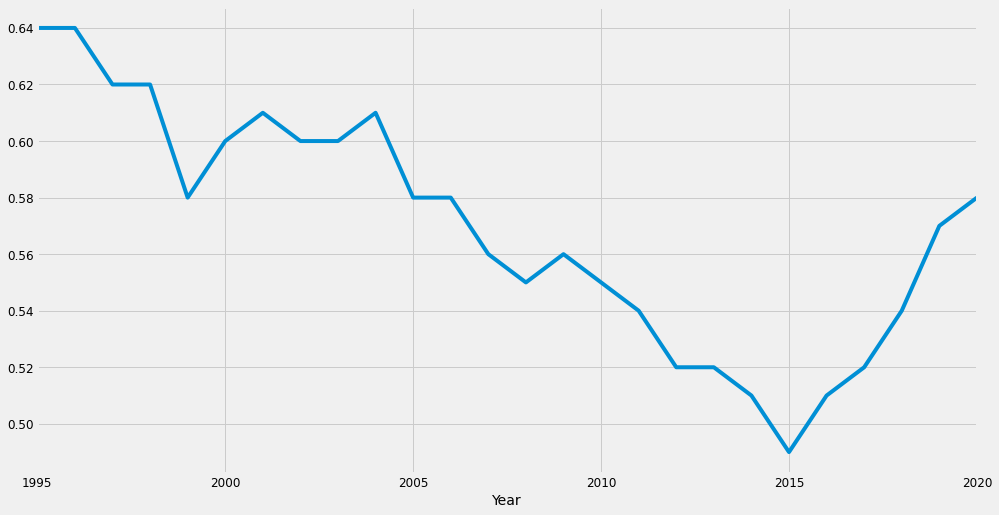

In [80]:
# Graph Trend of Y
y.plot(figsize=(15, 8))
plt.show()

In [102]:
print (df.dtypes)

Died/Too Sick            int64
Other                    int64
Received_Deceased        int64
Received_Living          int64
Total                    int64
Deceased_perc          float64
Living_perc            float64
Overall_SuccessRate    float64
dtype: object


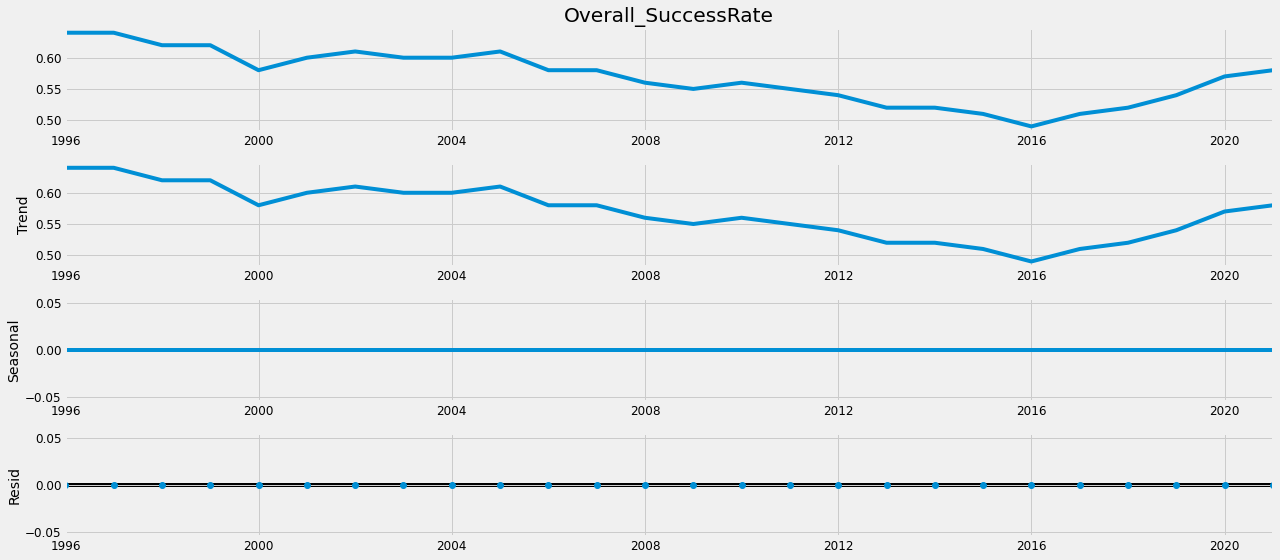

In [83]:
#Forecasting with ARIMA index
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [180]:
# Use the ARIMA model, first attempt at 5 periods
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in
list(itertools.product(p, d, q))]


In [181]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[5]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 5)
SARIMAX: (0, 0, 1) x (0, 1, 0, 5)
SARIMAX: (0, 1, 0) x (0, 1, 1, 5)
SARIMAX: (0, 1, 0) x (1, 0, 0, 5)
SARIMAX: (0, 1, 0) x (1, 0, 1, 5)


In [182]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try: 
            mod = sm.tsa.statespace.SARIMAX(y, order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False) 
            results = mod.fit()
            print('ARIMA{}x{}5 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 5)5 - AIC:44.64786995518616
ARIMA(0, 0, 0)x(0, 0, 1, 5)5 - AIC:37.438225833923
ARIMA(0, 0, 0)x(0, 1, 0, 5)5 - AIC:-68.43513563078437
ARIMA(0, 0, 0)x(0, 1, 1, 5)5 - AIC:-46.17692787980489
ARIMA(0, 0, 0)x(1, 0, 0, 5)5 - AIC:-75.38784118438049
ARIMA(0, 0, 0)x(1, 0, 1, 5)5 - AIC:-74.62267871715001
ARIMA(0, 0, 0)x(1, 1, 0, 5)5 - AIC:-50.27879449855878
ARIMA(0, 0, 0)x(1, 1, 1, 5)5 - AIC:-43.9883896335815
ARIMA(0, 0, 1)x(0, 0, 0, 5)5 - AIC:15.648657614671908
ARIMA(0, 0, 1)x(0, 0, 1, 5)5 - AIC:15.56706991407901
ARIMA(0, 0, 1)x(0, 1, 0, 5)5 - AIC:-74.80258110009558
ARIMA(0, 0, 1)x(0, 1, 1, 5)5 - AIC:-50.225376678474305
ARIMA(0, 0, 1)x(1, 0, 0, 5)5 - AIC:-84.46919291651099
ARIMA(0, 0, 1)x(1, 0, 1, 5)5 - AIC:-78.73024743691914
ARIMA(0, 0, 1)x(1, 1, 0, 5)5 - AIC:-64.1329502247866
ARIMA(0, 0, 1)x(1, 1, 1, 5)5 - AIC:-52.35318461561072
ARIMA(0, 1, 0)x(0, 0, 0, 5)5 - AIC:-124.57242040708539
ARIMA(0, 1, 0)x(0, 0, 1, 5)5 - AIC:-99.91432192538926
ARIMA(0, 1, 0)x(0, 1, 0, 5)5 - AI

In [184]:
# Fitting the Model using lowest AIC
mod = sm.tsa.statespace.SARIMAX(y, order=(1,0,0),seasonal_order=(0,0,0,5),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9951      0.006    167.772      0.000       0.983       1.007
sigma2         0.0003    9.4e-05      2.980      0.003    9.58e-05       0.000


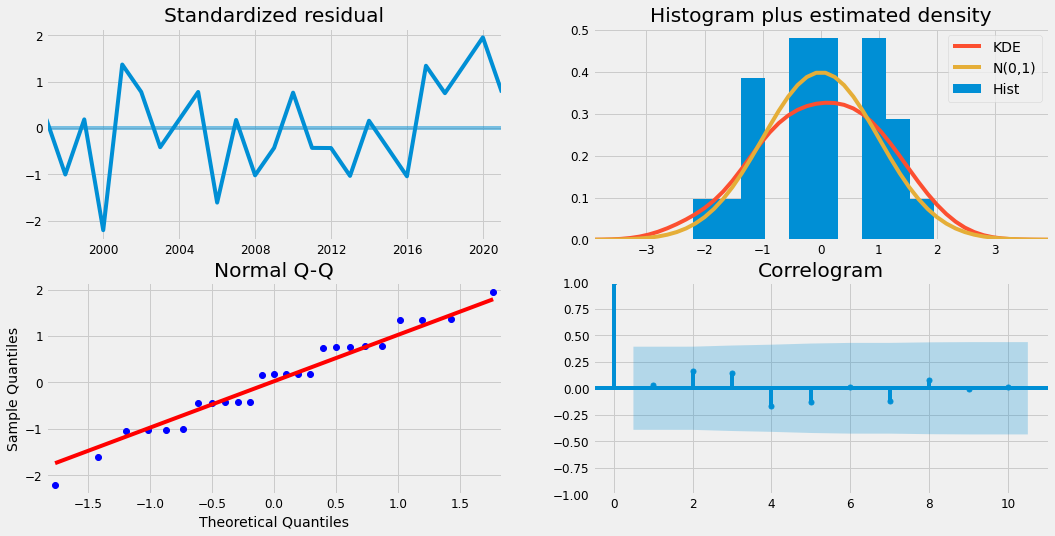

In [185]:
# Run diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

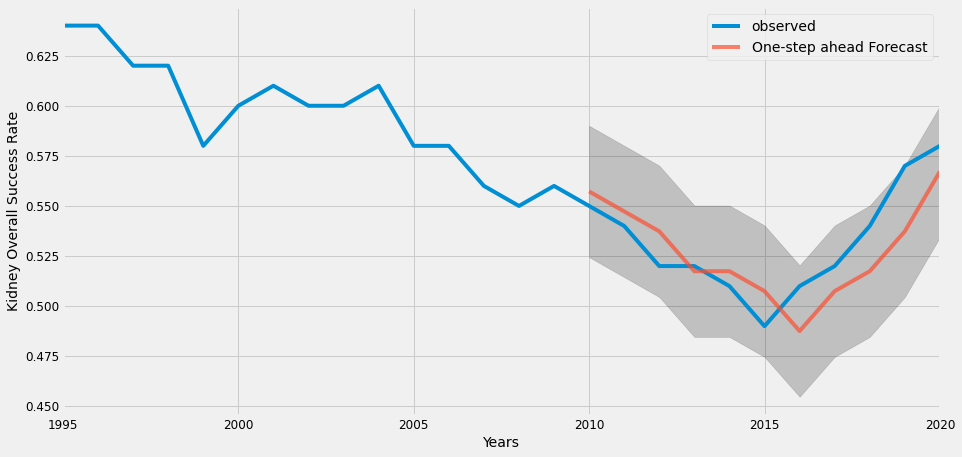

In [189]:
# Validating Forecasts
pred = results.get_prediction(start=pd.to_datetime('2010-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['1995-12-31':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Years')
ax.set_ylabel('Kidney Overall Success Rate')
plt.legend()

plt.show()

